<a href="https://colab.research.google.com/github/cam2149/DistributedProcessing/blob/main/Taller1_dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller en clase**

Descargar yellow tripdata de enero, febrero, marzo de 2025. Link  https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page



1.   Llenar los valores nulos de la columna passenger count con 0
2.   Agregar los datos por vendorId sumando la cantidad de pasajeros totales  y el promedio de fare amount

3.  Crear una variable sintetica que indique si el viaje tuvo propina
4.  Calcular los precio promedio por minutos





### **Instalación de librerias necesarias**

In [267]:
!pip install dask[complete] pandas numpy matplotlib kaggle

In [268]:
!du -hs *

24K	dask-expr.svg
55M	sample_data
162M	top-spotify-songs-in-73-countries-daily-updated.zip
475M	universal_top_spotify_songs.csv
57M	yellow_tripdata_2025-01.parquet
58M	yellow_tripdata_2025-02.parquet
67M	yellow_tripdata_2025-03.parquet


###**A continuación se importaran las librerias requeridas para el laboratorio**

In [269]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import time

###**Lectura de datos con pandas y dask**

In [270]:
parquet_files = [
    '/content/yellow_tripdata_2025-01.parquet',
    '/content/yellow_tripdata_2025-02.parquet',
    '/content/yellow_tripdata_2025-03.parquet'
]
dd_df = dd.read_parquet(parquet_files)

###**Operaciones con Dask**

In [271]:
print(dd_df.npartitions)

3


In [272]:
dd_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
npartitions=3,,,,,,,,,,,,,,,,,,,,
,int32,datetime64[us],datetime64[us],int64,float64,int64,string,int32,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [273]:
dd_df.get_partition(0).describe().compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06,3.475226e+06
mean,1.785428e+00,NaN,NaN,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01,4.834093e-01
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01,3.619307e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01


## Llenar los valores nulos de la columna passenger count con 0


In [274]:
dd_df['passenger_count'] = dd_df['passenger_count'].fillna(0)

In [275]:
dd_df['passenger_count'].value_counts().compute()

,count
passenger_count,
2.0,1221270
3.0,269952
7.0,12
0.0,2332871
1.0,7118030
4.0,169848
5.0,53050
6.0,32958
8.0,27


## Agregar los datos por vendorId sumando la cantidad de pasajeros totales y el promedio de fare amount

In [276]:
aggregated_df = dd_df.groupby('VendorID').agg(
    total_passenger_count=('passenger_count', 'sum'),
    average_fare_amount=('fare_amount', 'mean')
).compute()

print(aggregated_df)

          total_passenger_count  average_fare_amount
VendorID                                            
1                     2284185.0            18.127017
2                     9194397.0            17.013582
7                       34606.0            15.510085
6                           0.0             2.956592


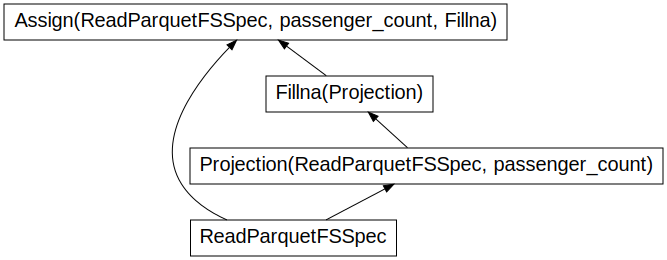

In [277]:
dd_df.visualize()

In [278]:
dd_df['has_tip'] = dd_df['tip_amount'] > 0

In [279]:
aggregated_by_tip = dd_df.groupby('has_tip').agg(
    total_tip_count=('has_tip', 'count')
).compute()

print(aggregated_by_tip)

         total_tip_count
has_tip                 
True             7221500
False            3976526


## Calcular los precio promedio por minutos

In [280]:
dd_df['trip_duration_seconds'] = (dd_df['tpep_dropoff_datetime'] - dd_df['tpep_pickup_datetime']).dt.total_seconds()
dd_df['trip_duration_minutes'] = dd_df['trip_duration_seconds'] / 60

filtered_dd_df = dd_df[(dd_df['trip_duration_minutes'] > 0) & (dd_df['total_amount'] > 0)]

filtered_dd_df['price_per_minute'] = filtered_dd_df['total_amount'] / filtered_dd_df['trip_duration_minutes']

average_price_per_minute = filtered_dd_df['price_per_minute'].mean().compute()

print(f"Precio promedio por minutos: {average_price_per_minute:.2f}")

Precio promedio por minutos: 4.74


## Calcular los precio dividido distancia

In [281]:
dd_df['trip_distance'] = dd_df['trip_distance'].fillna(0)

In [282]:

filtered_dd_df_distance = dd_df[(dd_df['trip_distance'] > 0) & (dd_df['total_amount'] > 0)]

filtered_dd_df_distance['price_per_distance'] = filtered_dd_df_distance['total_amount'] / filtered_dd_df_distance['trip_distance']

average_price_per_distance = filtered_dd_df_distance['price_per_distance'].mean().compute()

print(f"El precio promedio por distancia: {average_price_per_distance:.2f}")

El precio promedio por distancia: 23.35


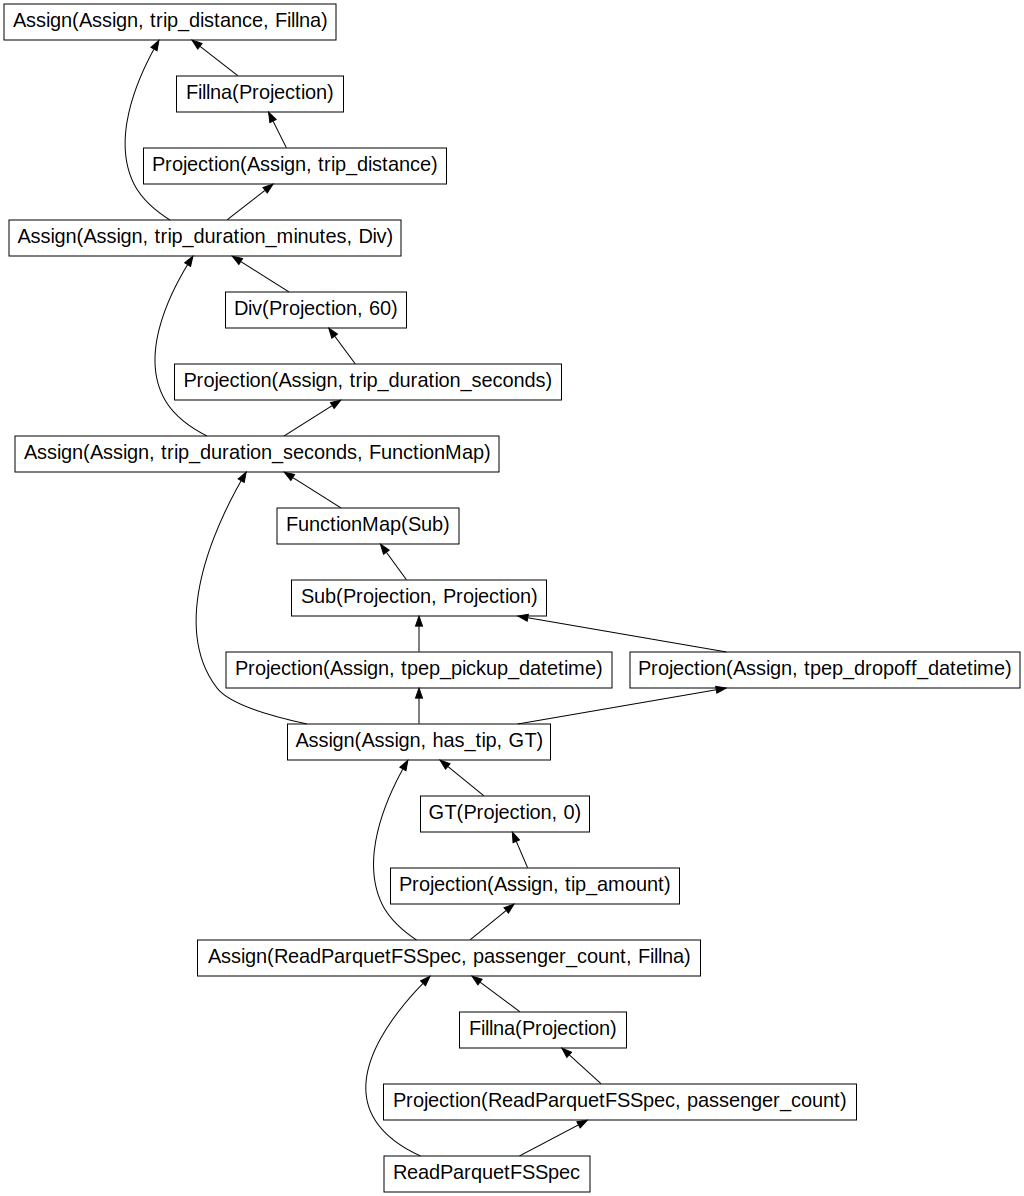

In [283]:
dd_df.visualize()